# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

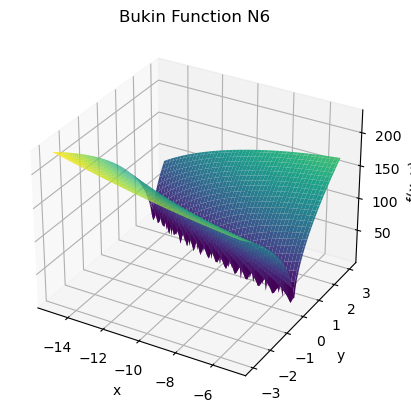

In [1]:
import numpy as np

def bukin_function(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x**2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of x and y
x_range = np.linspace(-15, -5, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the Z values using the Bukin function
Z = bukin_function(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Bukin Function N6')

# Show the plot
plt.show()


*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [132]:
#initial state
start_x = -10
start_y = -3

end_x = -5
end_y = 3

step = 1
tol = 0 # stop criterion

while(start_x <= end_x and start_y <= end_y):
    
    current_value = bukin_function(start_x, start_y)
    
    left_value = bukin_function(start_x - step, start_y)
    right_value = bukin_function(start_x + step, start_y)
    down_value = bukin_function(start_x, start_y - step)
    up_value = bukin_function(start_x, start_y + step)
    
    min_value = min(left_value, right_value, down_value, up_value)
   
    if min_value < current_value:
        if min_value == left_value:
            start_x -= step
        elif min_value == right_value:
            start_x += step
        elif min_value == down_value:
            start_y -= step
        else:
            start_y += step
    else:
        break
        
    if abs(min_value - current_value) <= tol:
        break
    
min_point = (start_x, start_y)
min_value = bukin_function(start_x, start_y)

print(min_point, min_value)

(-10, 1) 0.0


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [135]:
import numpy as np

# Define the Knapsack problem
weights = [2, 3, 5, 7, 9]  # weights of the items
values = [4, 11, 10, 12, 15]  # values of the items
max_weight = 18  # maximum weight the knapsack can hold

# Define a function to calculate the fitness of a state (combination of items)
def calculate_fitness(state):
    total_weight = np.dot(state, weights)
    total_value = np.dot(state, values)
    if total_weight > max_weight:
        return 0  # penalize solutions that exceed the maximum weight
    else:
        return total_value

# Define a function to generate a random initial state
def get_initial_state(num_items):
    return np.zeros(num_items, dtype=int)

# Define a function to generate neighboring states
def get_neighbors(state):
    neighbors = []
    for i in range(len(state)):
        neighbor = np.copy(state)
        neighbor[i] = 1 - neighbor[i]  # switch 0 to 1 or 1 to 0
        neighbors.append(neighbor)
    return neighbors

# Define the Hill Climbing algorithm to solve the Knapsack problem
def hill_climbing(start_state, max_iterations):
    current_state = start_state
    for i in range(max_iterations):
        current_fitness = calculate_fitness(current_state)
        neighbors = get_neighbors(current_state)
        best_neighbor_fitness = current_fitness
        for neighbor in neighbors:
            neighbor_fitness = calculate_fitness(neighbor)
            if neighbor_fitness > best_neighbor_fitness:
                best_neighbor_fitness = neighbor_fitness
                best_neighbor = neighbor
        if best_neighbor_fitness <= current_fitness:
            break
        current_state = best_neighbor
    return current_state

# Test the algorithm on the Knapsack problem
num_items = len(weights)
start_state = get_initial_state(num_items)
max_iterations = 1000
solution = hill_climbing(start_state, max_iterations)

print("Selected items:")
total_value = 0
for i in range(num_items):
    if solution[i] == 1:
        print(f"Item {i+1}: Weight = {weights[i]}, Value = {values[i]}")
        total_value += values[i]

print("Total value: ", total_value)
print("Best solution: ", 33)

Selected items:
Item 1: Weight = 2, Value = 4
Item 4: Weight = 7, Value = 12
Item 5: Weight = 9, Value = 15
Total value:  31
Best solution:  33



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [137]:
import numpy as np

# Define the Knapsack problem
weights = [2, 3, 5, 7, 9]  # weights of the items
values = [4, 7, 10, 12, 15]  # values of the items
max_weight = 18  # maximum weight the knapsack can hold

# Define a function to calculate the fitness of a state (combination of items)
def calculate_fitness(state):
    total_weight = np.dot(state, weights)
    total_value = np.dot(state, values)
    if total_weight > max_weight:
        return 0  # penalize solutions that exceed the maximum weight
    else:
        return total_value

# Define a function to generate a random initial state
def get_initial_state(num_items):
    return np.random.randint(2, size=num_items)

# Define a function to generate neighboring states
def get_neighbors(state):
    neighbors = []
    for i in range(len(state)):
        for j in range(i + 1, len(state)):
            neighbor = np.copy(state)
            neighbor[i] = 1 - neighbor[i]  # switch 0 to 1 or 1 to 0
            neighbor[j] = 1 - neighbor[j]  # switch 0 to 1 or 1 to 0
            neighbors.append(neighbor)
    return neighbors

# Define the Hill Climbing algorithm with random restarts to solve the Knapsack problem
def hill_climbing(start_state, max_iterations, num_restarts):
    best_solution = None
    best_fitness = 0
    for _ in range(num_restarts):
        current_state = start_state
        for i in range(max_iterations):
            current_fitness = calculate_fitness(current_state)
            neighbors = get_neighbors(current_state)
            best_neighbor_fitness = current_fitness
            best_neighbor = current_state
            for neighbor in neighbors:
                neighbor_fitness = calculate_fitness(neighbor)
                if neighbor_fitness > best_neighbor_fitness:
                    best_neighbor_fitness = neighbor_fitness
                    best_neighbor = neighbor
            if best_neighbor_fitness <= current_fitness:
                break
            current_state = best_neighbor
        if best_fitness < calculate_fitness(current_state):
            best_fitness = calculate_fitness(current_state)
            best_solution = current_state
    return best_solution

# Test the optimized algorithm on the Knapsack problem
num_items = len(weights)
max_iterations = 10000
num_restarts = 1000
start_state = get_initial_state(num_items)
solution = hill_climbing(start_state, max_iterations, num_restarts)

print("Selected items:")
total_value = 0
for i in range(num_items):
    if solution[i] == 1:
        print(f"Item {i+1}: Weight = {weights[i]}, Value = {values[i]}")
        total_value += values[i]
print("Total value: ", total_value)
print("Best solution: ", 33)


Selected items:
Item 1: Weight = 2, Value = 4
Item 2: Weight = 3, Value = 7
Item 3: Weight = 5, Value = 10
Item 4: Weight = 7, Value = 12
Total value:  33
Best solution:  33
